# Table of Contents
 <p><div class="lev1 toc-item"><a href="#1.-Weigh-in-Motion-Storage-Raw-Data" data-toc-modified-id="1.-Weigh-in-Motion-Storage-Raw-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Weigh-in-Motion Storage Raw Data</a></div><div class="lev2 toc-item"><a href="#1.1-Standards" data-toc-modified-id="1.1-Standards-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1.1 Standards</a></div><div class="lev3 toc-item"><a href="#1.1.1-File-anda-dataset-names" data-toc-modified-id="1.1.1-File-anda-dataset-names-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>1.1.1 File anda dataset names</a></div><div class="lev3 toc-item"><a href="#1.1.2-Fields-name-and-extra-information" data-toc-modified-id="1.1.2-Fields-name-and-extra-information-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>1.1.2 Fields name and extra information</a></div><div class="lev2 toc-item"><a href="#1.2-Algorithms" data-toc-modified-id="1.2-Algorithms-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1.2 Algorithms</a></div><div class="lev3 toc-item"><a href="#1.2.1-Start-up" data-toc-modified-id="1.2.1-Start-up-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>1.2.1 Start up</a></div><div class="lev3 toc-item"><a href="#1.2.2-Creating-the-file" data-toc-modified-id="1.2.2-Creating-the-file-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>1.2.2 Creating the file</a></div><div class="lev3 toc-item"><a href="#1.2.3-Reading-the-file" data-toc-modified-id="1.2.3-Reading-the-file-123"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>1.2.3 Reading the file</a></div><div class="lev1 toc-item"><a href="#References" data-toc-modified-id="References-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>References</a></div>

# 1. Weigh-in-Motion Storage Raw Data

Basically, the first main input data is the raw data sensors. These data can be acquired using a data acquisition device (DAQ) through analog channels (e.g. weigh sensors, temperature sensors, etc) and/or digital channels (e.g., inductive loops).

The three more wideley piezo-eletric weigh sensors used are piezo-ceramic, piezo-polymer and piezo-electric <cite data-cite="jiang2009improvements">(Jiang, 2009)</cite>.

The storing the raw sensor data allows studying of the input signals and validating weigh methods. In COST 323 <cite data-cite="tech:cost-323">(Jacob et al., 2009)</cite>, it was not found any description about the raw data layout file. By the way, this data can be represented by a matrix using as a first column a index with time instant, it can be represented by microseconds in floating point format and it is followed by other columns representing each sensor data.

## 1.1 Standards

On one file it can be saved any measurements of vehicle's run, e.g. the researcher can create one file per day and on each file all vehicle's run, with respecting to the date of the file. Each vehicle's run should be saved on a specific dataset. The main idea of these standards is promoting a best practice to store and share weigh-in-motion data.

### 1.1.1 File anda dataset names

The filename should have be informative, respecting the date, site and lane and the organization type of the dataset. If the file contains measurements from more than one site so the site identification number should be **000**. The same idea should be used to lane identification number. The date field from the filename should contain the initial date time of the period. If it is necessary, inform the initial time too (optional). The standard structure proposed is:

```
wim_t_sss_ll_yyyymmdd[_hhMMSS]
```

E.g. **wim_d_001_01_20174904_004936**. When: 

* ***wim* is a fixed text;
* **t** means the organization type of the datasets (i.e. **d** means one file per day,  **w** means one file per week, **m** means one file per month, **y** means one file per year and **f** means a full file with a complete data);
* **sss** means site identification number (e.g. 001);
* **ll** means lane identification number (e.g. 02);
* **yyyy** means the year (e.g. 2012);
* **mm** means the mounth (e.g. 12);
* **dd** means the day (e.g. 30);
* **hh** means the hour (e.g. 23);
* **MM** means the minute (e.g. 59);
* **SS** means (e.g. 30).

For each vehicle's run, it should create a new dataset. The dataset name should contain site identification number, lane identification number, date and time. The standard structure proposed is:

```
run_sss_ll_yyyymmdd_hhMMSS
```

E.g. **run_001_01_20174904_004936**. When **run** is a fixed text. The other fields in dataset name can be explained as in file name standard.

### 1.1.2 Fields name and extra information

Each dataset contains information from signal data. The dataset should contain some extra information to allow data post-processing. The columns on the dataset should be **index** and data from analog channels and digital channels. The standard for column names should be:

```
{t}{n}
```

Where {t} means the channel type (i.e. can be set as **a** for analog, or **d** for digital) and {n} means the number of the channel (e.g. **a1**).


The main extra information that should be saved on the dataset is:

* date time (e.g. 2017-49-04 00:49:36);
* site id (e.g. 001);
* lane id (e.g. 01);
* temperature (e.g. 28.5);
* lpr (e.g. AAA9999);
* sensor calibration factory (e.g. [0.98, 0.99, 0.75]);
* distance between sensors (e.g. [1.0, 1.5, 2.0]);
* sensor type (e.g. quartz, polymer, ceramic, mixed);
* sensors layout (e.g. |/|\\|<|>|=|)
* channel configuration (this is a optional attribute, it is required just when sensor type is mixed, e.g. {'a0': 'polymer', 'a1': 'ceramic'}) 

## 1.2 Algorithms

The algorithms presented here was written in Python language. If it is necessary to use another language would be easy to convert or rewrite this code in any language.

Storage Data module should be able to write and read data from hdf5 file with a simple approach, in other words, it should be easy for anybody to manipulate and understand this data using other languages. 

In [1]:
from IPython.display import display
from datetime import datetime
from matplotlib import pyplot as plt
from scipy import misc

import h5py
import os
import numpy as np
import pandas as pd
import sys

### 1.2.1 Start up

In [2]:
# local
sys.path.insert(0, os.path.dirname(os.getcwd()))
from pywim.utils.dsp.synthetic_data.sensor_data import gen_truck_raw_data

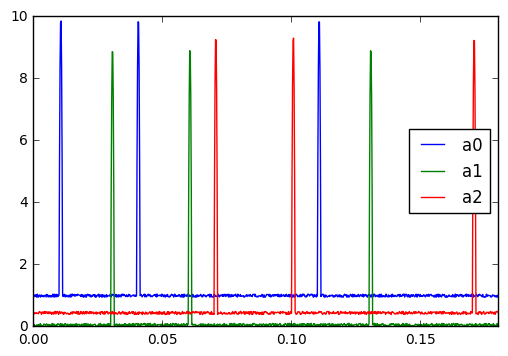

In [3]:
# generates a synthetic data
data = gen_truck_raw_data(
    sample_rate=5000, speed=50, vehicle_layout='O--O------O-',
    sensors_distance= [1, 2], p_signal_noise=10.0
)

data.plot()
plt.show()

In [4]:
data.head()

,a0,a1,a2
0.000000,0.942975,0.043699,0.475514
0.000200,0.960181,0.058168,0.391310
0.000400,0.965800,0.069547,0.441425
0.000601,1.017454,0.003586,0.425338
0.000801,0.968953,0.020942,0.416325


### 1.2.2 Creating the file

In [5]:
date_time = datetime.now()
site_id = '001'
lane_id = '01'
collection_type = 'd'  # stored per day

f_id = 'wim_{}_{}_{}_{}'.format(
    collection_type, site_id, lane_id, 
    date_time.strftime('%Y%M%d')
)

f = h5py.File('/tmp/{}.h5'.format(f_id), 'w')

In [6]:
dset_id = 'run_{}_{}_{}'.format(
    site_id, lane_id, date_time.strftime('%Y%M%d_%H%M%S')
)
dset_id

'run_001_01_20174405_014447'

In [7]:
dset = f.create_dataset(
    dset_id, shape=(data.shape[0],),
    dtype=np.dtype([
        (k, float) for k in ['index'] + list(data.keys())
    ])
)

dset['index'] = data.index

for k in data.keys():
    dset[k] = data[k]

In [8]:
# check if all values are the same
df = pd.DataFrame(dset[tuple(data.keys())], index=dset['index'])
np.all(df == data)

True

In [9]:
dset.attrs['date_time'] = date_time.strftime('%Y-%M-%d %H:%M:%S')
dset.attrs['site_id'] = site_id
dset.attrs['lane_id'] = lane_id
dset.attrs['temperature'] = 28.5
dset.attrs['lpr'] = 'AAA9999'  # license plate number

### 1.2.3 Reading the file

In [10]:
print('/tmp/{}.h5'.format(f_id))

f = h5py.File('/tmp/{}.h5'.format(f_id), 'r')

/tmp/wim_d_001_01_20174405.h5



--------------------------------------------------------------------------------
run_001_01_20174405_014447
--------------------------------------------------------------------------------
date_time: 2017-44-05 01:44:47
site_id: 001
lane_id: 01
temperature: 28.5
lpr: AAA9999


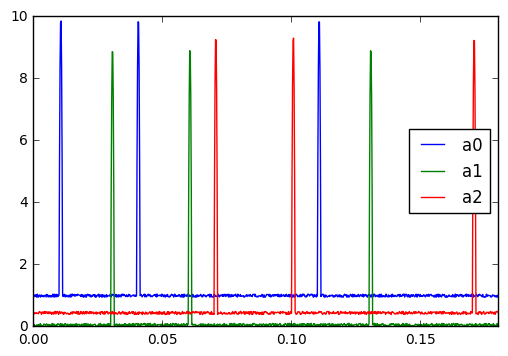

In [11]:
for dset_id in f.keys():
    dset = f[dset_id]
    
    print('')
    print('-'*80)
    print(dset_id)
    print('-'*80)
    print('date_time:', dset.attrs['date_time'])
    print('site_id:', dset.attrs['site_id'])
    print('lane_id:', dset.attrs['lane_id'])
    print('temperature:', dset.attrs['temperature'])
    print('lpr:', dset.attrs['lpr'])
    
    pd.DataFrame(dset[dset.dtype.names[1:]], index=dset['index']).plot()
    plt.show()
    
    f.__delitem__(dset_id)

# References



Jiang, X. (2009). Improvements in Piezoelectric Sensors and WIM Data Collection Technology (Doctoral dissertation, University of Waterloo, Canada).

Jacob, B., OBrien, E. J., & Jehaes, S. (2002). Weigh-in-Motion of Road Vehicles: Final Report of the COST 323 Action. Laboratoire Central des Ponts et Chaussées Publications, Paris.